My(Stanley) part utilises some of data cleaning Martin and Serena has - we are all working to create a central pipeline. The bottom half of this coding file is what I have done.  

# Importing QS Access Data (Martin, Serena)

Workbook create by Martin Gossow. Some of the code is borrowed or modified from Serena's *Metric Analysis* notebook.

### Driving Question

Develop a pipeline that allows us to input data from a QSAccess CSV file and output a dataframe that gives the date, starting hour and number of steps for each of these hour slots. We also establish a standard format for which the analysis can be run.

### Setting up Packages and Filename

In [35]:
#Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [36]:
#File path for csv file
FILEPATH = "../../data/Participant_ID_A/User1.csv"

### Reading the Data

We us the pandas `read_csv` function which converts the file straight into a dataframe.

In [37]:
dat = pd.read_csv(FILEPATH)
dat.head(8)

,Start,Finish,Steps (count)
0,07-Dec-2014 09:00,07-Dec-2014 10:00,941.0
1,07-Dec-2014 10:00,07-Dec-2014 11:00,408.0
2,07-Dec-2014 11:00,07-Dec-2014 12:00,157.0
3,07-Dec-2014 12:00,07-Dec-2014 13:00,1017.0
4,07-Dec-2014 13:00,07-Dec-2014 14:00,0.0
5,07-Dec-2014 14:00,07-Dec-2014 15:00,0.0
6,07-Dec-2014 15:00,07-Dec-2014 16:00,137.0
7,07-Dec-2014 16:00,07-Dec-2014 17:00,0.0


### Formatting the Data

There are some things we need to fix up. We want to change the column `Steps (count)` to `Steps`. We also want to extract the `Start` column into datetime format, and extract the date and hour.

In [38]:
dat["Datetime"] = pd.to_datetime(dat["Start"], format = '%d-%b-%Y %H:%M')
dat["Date"] = dat["Datetime"].dt.date
dat["Hour"] = dat["Datetime"].dt.hour
dat.head(8)

,Start,Finish,Steps (count),Datetime,Date,Hour
0,07-Dec-2014 09:00,07-Dec-2014 10:00,941.0,2014-12-07 09:00:00,2014-12-07,9
1,07-Dec-2014 10:00,07-Dec-2014 11:00,408.0,2014-12-07 10:00:00,2014-12-07,10
2,07-Dec-2014 11:00,07-Dec-2014 12:00,157.0,2014-12-07 11:00:00,2014-12-07,11
3,07-Dec-2014 12:00,07-Dec-2014 13:00,1017.0,2014-12-07 12:00:00,2014-12-07,12
4,07-Dec-2014 13:00,07-Dec-2014 14:00,0.0,2014-12-07 13:00:00,2014-12-07,13
5,07-Dec-2014 14:00,07-Dec-2014 15:00,0.0,2014-12-07 14:00:00,2014-12-07,14
6,07-Dec-2014 15:00,07-Dec-2014 16:00,137.0,2014-12-07 15:00:00,2014-12-07,15
7,07-Dec-2014 16:00,07-Dec-2014 17:00,0.0,2014-12-07 16:00:00,2014-12-07,16


We've extracted the date (as a datetime object) and the hour. Now we remove the columns that are no longer needed and rename the columns as required.

In [39]:
#Extract needed columns
dat = dat[["Date", "Hour", "Steps (count)"]]
#Rename columns
dat.columns = ["Date", "Hour", "Steps"]

### Displaying the dataframe

Finally, we display the dataframe in its final standardised format.

In [40]:
dat.head(10)

,Date,Hour,Steps
0,2014-12-07,9,941.0
1,2014-12-07,10,408.0
2,2014-12-07,11,157.0
3,2014-12-07,12,1017.0
4,2014-12-07,13,0.0
5,2014-12-07,14,0.0
6,2014-12-07,15,137.0
7,2014-12-07,16,0.0
8,2014-12-07,17,33.0
9,2014-12-07,18,0.0


### Putting everything together

We define a single function that takes in the filename and outputs the cleaned filedata. All the code is simply taken from the above cells.

In [41]:
def read_QS_data(filename):
    #Read in CSV file
    dat = pd.read_csv(filename)
    #Extract datetime information
    dat["Datetime"] = pd.to_datetime(dat["Start"], format = '%d-%b-%Y %H:%M')
    dat["Date"] = dat["Datetime"].dt.date
    dat["Hour"] = dat["Datetime"].dt.hour
    #Format columns
    dat = dat[["Date", "Hour", "Steps (count)"]]
    dat.columns = ["Date", "Hour", "Steps"]
    
    return dat

In [42]:
 x = read_QS_data(FILEPATH)

# Adherence functions (Stanley)


## Driving Question 
Streamline the data processing with functions to create a pipeline. Using the 3 methods detailed in Tang et al. (Assignment 1 Paper 2), we will apply these measures to determine if a day is valid or not. 

Each method has its own function- designed to return a list of Trues and Falses for each day. This will help other members of the group if they choose to match these days later on. 

##10 Hours of Non Zeroes

The first and foremost measure, it is 10 hours of non-zero step counts, the main measure in the personal informatics assignment.

In [43]:
# 10 hours of non zeroes 
def ten_hours_non_zeros(df,hours):
    df1 = df.copy()
    df1['Not Zero'] = df1['Steps'] > 0
    df1 = df1.groupby('Date').sum()
    df1 = df1['Not Zero'] > hours 
    return df1

##Greater than 500 steps a day

The second measure for which a day can be considered is a day where total step count is greater than 500 steps. This can be easily adjusted as we conduct more analysis.

In [44]:
#Greater than 500 steps
def greater_than_certain_steps(df,min_steps):
    df1 = df.copy()
    df1 = df1.groupby('Date').sum()
    df1 = df1['Steps']> min_steps
    return df1 

## Step counter greater than 0 in 3 time blocks

The final method is utilising the 3 time blocks, from 3 am to 11am , 11 am to 3 pm and 3pm to 3am. These time blocks was allocated in Tang et al, although there is no explanation into the cut-off points. If there is a steps within  each of these time blocks and for all 3 time blocks a day - it will be considered a valid day. 

In [45]:
#Active in 3 time blocks 
def three_time_blocks(df):
    df1 = df.copy()
    bins = [-1,2,10,14,25,np.inf]
    names = ['3','1','2', '4', '5']
    df1['3timeblock'] = pd.cut(df1['Hour'],bins, labels = names, ordered = False)
    df1 = df1.replace({'3timeblock':r'4'},{'3timeblock':'3'},regex = True)
    df1 = df1.replace({'3timeblock':r'5'},{'3timeblock':'3'},regex = True)
    df1 = df1.groupby(['Date','3timeblock'], as_index=False)['Steps'].sum()
    df1['Steps within timeblock'] = df1['Steps']> 0 
    df1 = df1.groupby('Date').sum()
    df1 = df1['Steps within timeblock'] ==3 
    return df1

## Combining it all

The function below combines all the results from the above 3 functions into one dataframe that lists the Trues and Falses for each of the day by each measure. The function below also shows how many days satisfy all 3 adherence/valid day measures via the ' All 3 True column'. 

In [46]:
#Combining it all into 1 dataframe
def three_method_table(x):
    valid_1= ten_hours_non_zeros(x,10)
    valid_2= greater_than_certain_steps(x,500)
    valid_3= three_time_blocks(x)
    result = pd.concat([valid_1,valid_2,valid_3], axis=1, join='inner')
    result.reset_index(level=0, inplace=True)
    result.columns = ["Date", "Ten Hours Non Zero","Steps > Five Hundred","Three Timeblock"]
    result['All Three True'] = result["Three Timeblock"]&result["Ten Hours Non Zero"]&result["Steps > Five Hundred"]
    result_sum = result.sum()
    return result , result_sum

## Actual results

Below, we run the central function above. We also obtain the count and percentage for each of the 3 measures to see how many days remain. 

In [47]:
df_whole = three_method_table(x)[0]
df_sum = three_method_table(x)[1]
df_sum_pct = df_sum/len(df_whole)
print(df_whole)
print("")
print(df_sum)
print("")
print(df_sum_pct)
print("")



            Date  Ten Hours Non Zero  Steps > Five Hundred  Three Timeblock  \
0     2014-12-07               False                  True             True   
1     2014-12-08                True                  True             True   
2     2014-12-09               False                  True             True   
3     2014-12-10               False                  True             True   
4     2014-12-11               False                  True            False   
...          ...                 ...                   ...              ...   
1749  2019-09-21               False                  True            False   
1750  2019-09-22               False                  True            False   
1751  2019-09-23               False                  True             True   
1752  2019-09-24               False                  True            False   
1753  2019-09-25               False                 False            False   

      All Three True  
0              False  
1    

As you can see, the 10 Hour Non Zero Step count has an extremely high cut off rate which is the main measure we are interested in for our project. Other measures are more lenient such as the 3 timeblock and Steps > 500. Only 24% of all days satisfy and pass all 3 measures. This might be slightly concerning for our project. 

In [48]:
# 10 hours of non zeroes 
def ten_hours_non_zeros(df,hours):
    df1 = df.copy()
    df1['Not Zero'] = df1['Steps'] > 0
    df1 = df1.groupby('Date').sum()
    df1 = df1['Not Zero'] >= hours
    return df1.sum()/len(df1)


In [49]:
zero_to_twentyfour_pct = []
hour_range = np.arange(0,25,1)
for i in hour_range:
    zero_to_twentyfour_pct.append(ten_hours_non_zeros(x,i))
  

Text(0.5, 1.0, 'Hours Cut-off vs Percentage')

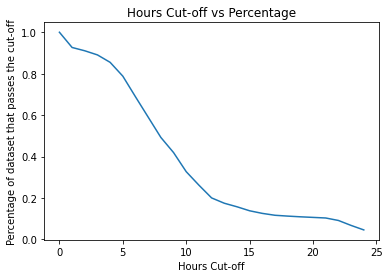

In [50]:
plt.plot(hour_range,zero_to_twentyfour_pct)
plt.xlabel('Hours Cut-off')
plt.ylabel('Percentage of dataset that passes the cut-off')
plt.title('Hours Cut-off vs Percentage')

In [51]:
#Finding the maximum of the 
max(x['Steps'])

7204.61132142913

In [52]:
def greater_than_certain_steps_test(df,min):
    df1 = df.copy()
    df1 = df1.groupby('Date').sum()
    df1 = df1['Steps']> min
    return df1.sum()/len(df1)

In [53]:
steps_pct = []
steps_range = np.arange(0,7204,5)
for i in steps_range:
    steps_pct.append(greater_than_certain_steps_test(x,i))

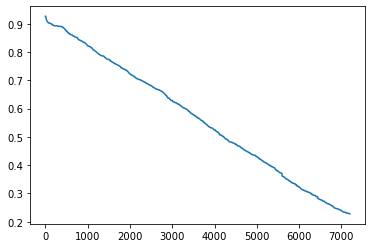

In [54]:
plt.plot(steps_range,steps_pct)